In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.527226,0.831654,1.864028e-07,0.595915,0.803978,-0.034770,0.658909,0.728240,-0.053192,0.681976,...,0.523488,0.560837,-0.078987,0.536646,0.628775,-0.065938,0.527944,0.663839,-0.045723,1
1,0.509137,0.831126,1.343285e-07,0.567467,0.794880,-0.031173,0.620327,0.699910,-0.045675,0.627733,...,0.464025,0.574417,-0.072245,0.486826,0.635001,-0.059286,0.483218,0.673484,-0.040730,1
2,0.466514,0.830588,1.523610e-08,0.521060,0.779593,-0.030062,0.558637,0.676808,-0.045782,0.550704,...,0.394754,0.588139,-0.073650,0.422085,0.641587,-0.060338,0.421157,0.677097,-0.041950,1
3,0.428633,0.828432,-1.576024e-08,0.477390,0.769028,-0.028849,0.503940,0.664958,-0.044006,0.487554,...,0.339135,0.605831,-0.072350,0.369887,0.654876,-0.059790,0.374215,0.692138,-0.042041,1
4,0.404750,0.839620,-4.796861e-08,0.448640,0.771445,-0.028842,0.464216,0.662277,-0.043730,0.437276,...,0.294842,0.631108,-0.071778,0.331476,0.678879,-0.059007,0.340299,0.714587,-0.041430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.527948,0.723013,-2.146271e-08,0.609179,0.741386,-0.048998,0.702453,0.679126,-0.060921,0.766137,...,0.541192,0.394112,-0.047641,0.554684,0.340157,-0.055420,0.571105,0.283536,-0.052447,iloveu
595,0.543512,0.727028,-2.403202e-08,0.628148,0.744741,-0.046780,0.722237,0.679750,-0.055882,0.784348,...,0.559372,0.392954,-0.041973,0.573568,0.340515,-0.049202,0.590246,0.285046,-0.045927,iloveu
596,0.557290,0.737345,-2.211626e-08,0.645633,0.750404,-0.044738,0.738949,0.682316,-0.052296,0.799136,...,0.564718,0.396635,-0.042016,0.578793,0.341772,-0.049661,0.595055,0.284408,-0.046236,iloveu
597,0.519578,0.719272,-4.548007e-08,0.607750,0.699293,-0.041146,0.685269,0.613831,-0.048683,0.729579,...,0.471493,0.395527,-0.037626,0.471509,0.339861,-0.042673,0.473222,0.286635,-0.037696,iloveu


In [5]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.527226,0.831654,1.864028e-07,0.595915,0.803978,-0.034770,0.658909,0.728240,-0.053192,0.681976,...,0.523488,0.560837,-0.078987,0.536646,0.628775,-0.065938,0.527944,0.663839,-0.045723,1
1,0.509137,0.831126,1.343285e-07,0.567467,0.794880,-0.031173,0.620327,0.699910,-0.045675,0.627733,...,0.464025,0.574417,-0.072245,0.486826,0.635001,-0.059286,0.483218,0.673484,-0.040730,1
2,0.466514,0.830588,1.523610e-08,0.521060,0.779593,-0.030062,0.558637,0.676808,-0.045782,0.550704,...,0.394754,0.588139,-0.073650,0.422085,0.641587,-0.060338,0.421157,0.677097,-0.041950,1
3,0.428633,0.828432,-1.576024e-08,0.477390,0.769028,-0.028849,0.503940,0.664958,-0.044006,0.487554,...,0.339135,0.605831,-0.072350,0.369887,0.654876,-0.059790,0.374215,0.692138,-0.042041,1
4,0.404750,0.839620,-4.796861e-08,0.448640,0.771445,-0.028842,0.464216,0.662277,-0.043730,0.437276,...,0.294842,0.631108,-0.071778,0.331476,0.678879,-0.059007,0.340299,0.714587,-0.041430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.527948,0.723013,-2.146271e-08,0.609179,0.741386,-0.048998,0.702453,0.679126,-0.060921,0.766137,...,0.541192,0.394112,-0.047641,0.554684,0.340157,-0.055420,0.571105,0.283536,-0.052447,iloveu
595,0.543512,0.727028,-2.403202e-08,0.628148,0.744741,-0.046780,0.722237,0.679750,-0.055882,0.784348,...,0.559372,0.392954,-0.041973,0.573568,0.340515,-0.049202,0.590246,0.285046,-0.045927,iloveu
596,0.557290,0.737345,-2.211626e-08,0.645633,0.750404,-0.044738,0.738949,0.682316,-0.052296,0.799136,...,0.564718,0.396635,-0.042016,0.578793,0.341772,-0.049661,0.595055,0.284408,-0.046236,iloveu
597,0.519578,0.719272,-4.548007e-08,0.607750,0.699293,-0.041146,0.685269,0.613831,-0.048683,0.729579,...,0.471493,0.395527,-0.037626,0.471509,0.339861,-0.042673,0.473222,0.286635,-0.037696,iloveu


In [6]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (599, 63)
Labels shape = (599,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [9]:
y_pred = svm.predict(x_test)
y_pred

array(['2', '1', '5', '5', '3', '4', '3', 'iloveu', 'iloveu', '5', '5',
       '4', 'iloveu', 'iloveu', '4', '4', '3', '4', '3', '4', '3', '1',
       '3', '2', '3', 'iloveu', '1', '1', '4', 'iloveu', '5', '2', '3',
       'iloveu', '1', '5', '4', 'iloveu', '4', '3', '4', '1', '2', '1',
       '4', '1', '5', '5', '4', '2', '5', '2', '3', '3', '2', '5',
       'iloveu', '4', '2', '4', '3', '5', '2', '5', 'iloveu', '1', '2',
       '4', '1', '2', '1', '1', '4', '4', '5', '4', '3', '1', '4', '3',
       '1', '1', '1', '1', 'iloveu', '5', '3', 'iloveu', '5', 'iloveu',
       '4', '5', '1', '2', '1', '1', '2', '2', '3', '1', '1', 'iloveu',
       'iloveu', '3', '5', 'iloveu', '5', '3', '3', 'iloveu', '4', '5',
       '2', 'iloveu', '3', '1', '1', '4', '4', 'iloveu'], dtype=object)

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

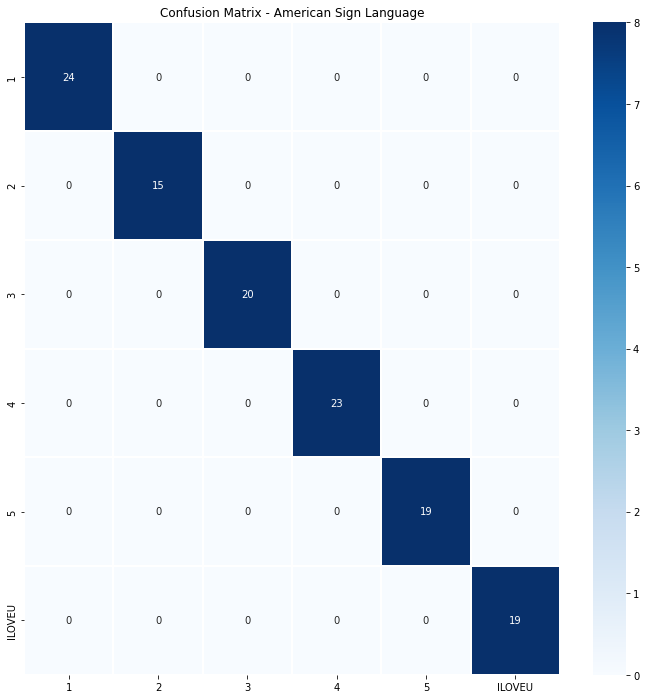

In [11]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [12]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)